In [1]:
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
%matplotlib inline

In [2]:
df=pd.read_excel('boshanma.xls')
df.head()

,Unnamed: 0,İllər,Nigahların sayı,Boşanmaların sayı
0,NaN,NaN,NaN,NaN
1,NaN,1935.0,31262.0,14438.0
2,NaN,1936.0,31840.0,11607.0
3,NaN,1937.0,29663.0,8379.0
4,NaN,1938.0,32344.0,9652.0


In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df.head()

,İllər,Nigahların sayı,Boşanmaların sayı
0,NaN,NaN,NaN
1,1935.0,31262.0,14438.0
2,1936.0,31840.0,11607.0
3,1937.0,29663.0,8379.0
4,1938.0,32344.0,9652.0


In [5]:
df=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 1 to 85
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   İllər              85 non-null     float64
 1   Nigahların sayı    85 non-null     float64
 2   Boşanmaların sayı  85 non-null     float64
dtypes: float64(3)
memory usage: 2.7 KB


In [7]:
df.describe()

,İllər,Nigahların sayı,Boşanmaların sayı
count,85.000000,85.000000,85.000000
mean,1977.000000,48572.329412,6743.505882
std,24.681302,19670.737787,3797.982612
min,1935.000000,10840.000000,310.000000
25%,1956.000000,34359.000000,4174.000000
50%,1977.000000,44889.000000,6869.000000
75%,1998.000000,65962.000000,8511.000000
max,2019.000000,88145.000000,17148.000000


In [8]:
df=df.rename(columns={'İllər':'tarix','Nigahların sayı':'nikah','Boşanmaların sayı':'boshanma'})

In [9]:
df

,tarix,nikah,boshanma
1,1935.0,31262.0,14438.0
2,1936.0,31840.0,11607.0
3,1937.0,29663.0,8379.0
4,1938.0,32344.0,9652.0
5,1939.0,29542.0,9747.0
...,...,...,...
81,2015.0,68773.0,12764.0
82,2016.0,66771.0,13114.0
83,2017.0,62923.0,14514.0
84,2018.0,62484.0,14857.0


In [10]:
df['tarix']=df['tarix'].astype(int).astype(str)

In [11]:
df

,tarix,nikah,boshanma
1,1935,31262.0,14438.0
2,1936,31840.0,11607.0
3,1937,29663.0,8379.0
4,1938,32344.0,9652.0
5,1939,29542.0,9747.0
...,...,...,...
81,2015,68773.0,12764.0
82,2016,66771.0,13114.0
83,2017,62923.0,14514.0
84,2018,62484.0,14857.0


In [12]:
df['tarix'].min(), df['tarix'].max()

('1935', '2019')

In [13]:
df['tarix'] = pd.to_datetime(df['tarix'])

In [14]:
df.shape

(85, 3)

In [15]:
df = df.set_index('tarix')
df.index

DatetimeIndex(['1935-01-01', '1936-01-01', '1937-01-01', '1938-01-01',
               '1939-01-01', '1940-01-01', '1941-01-01', '1942-01-01',
               '1943-01-01', '1944-01-01', '1945-01-01', '1946-01-01',
               '1947-01-01', '1948-01-01', '1949-01-01', '1950-01-01',
               '1951-01-01', '1952-01-01', '1953-01-01', '1954-01-01',
               '1955-01-01', '1956-01-01', '1957-01-01', '1958-01-01',
               '1959-01-01', '1960-01-01', '1961-01-01', '1962-01-01',
               '1963-01-01', '1964-01-01', '1965-01-01', '1966-01-01',
               '1967-01-01', '1968-01-01', '1969-01-01', '1970-01-01',
               '1971-01-01', '1972-01-01', '1973-01-01', '1974-01-01',
               '1975-01-01', '1976-01-01', '1977-01-01', '1978-01-01',
               '1979-01-01', '1980-01-01', '1981-01-01', '1982-01-01',
               '1983-01-01', '1984-01-01', '1985-01-01', '1986-01-01',
               '1987-01-01', '1988-01-01', '1989-01-01', '1990-01-01',
      

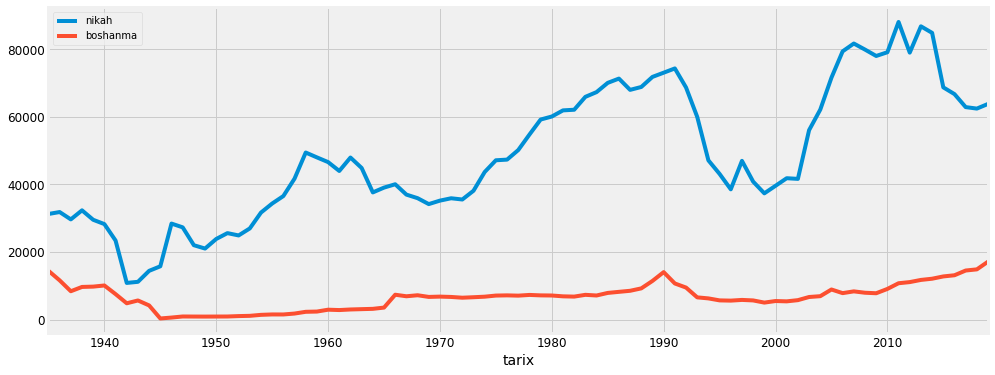

In [16]:
df.plot(figsize=(15, 6))
plt.show()

In [17]:
df=df.drop('nikah',axis=1)

In [18]:
df

,boshanma
tarix,
1935-01-01,14438.0
1936-01-01,11607.0
1937-01-01,8379.0
1938-01-01,9652.0
1939-01-01,9747.0
...,...
2015-01-01,12764.0
2016-01-01,13114.0
2017-01-01,14514.0


In [19]:
from fbprophet import Prophet

In [20]:
df=df.reset_index()

In [21]:
df = df.rename(columns={'tarix': 'ds', 'boshanma': 'y'})
df

,ds,y
0,1935-01-01,14438.0
1,1936-01-01,11607.0
2,1937-01-01,8379.0
3,1938-01-01,9652.0
4,1939-01-01,9747.0
...,...,...
80,2015-01-01,12764.0
81,2016-01-01,13114.0
82,2017-01-01,14514.0
83,2018-01-01,14857.0


In [22]:
df_model = Prophet(daily_seasonality=False,weekly_seasonality=False,changepoint_prior_scale=0.5,seasonality_prior_scale=1)
df_model.fit(df)
df_forecast = df_model.make_future_dataframe(periods=5, freq='Y')
df_forecast = df_model.predict(df_forecast)

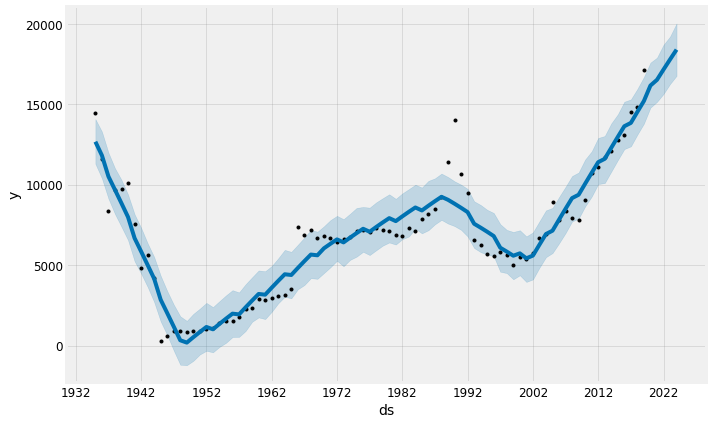

In [23]:
df_model.plot(df_forecast);

In [24]:
import plotly.graph_objects as go

In [25]:
fig = go.Figure([go.Scatter(x=df_forecast['ds'], y=df_forecast['yhat'])])
fig.show()


In [26]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_forecast['ds'], y=df_forecast['yhat'],name='predicted'))
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'],name='actual'))
fig.show()